In [ ]:
!git clone https://github.com/boku13/Speech_Understanding_Course_Project.git

Cloning into 'Speech_Understanding_Course_Project'...
remote: Enumerating objects: 6650, done.
remote: Counting objects: 100% (6311/6311), done.
remote: Compressing objects: 100% (5973/5973), done.
remote: Total 6650 (delta 359), reused 6282 (delta 332), pack-reused 339 (from 1)
Receiving objects: 100% (6650/6650), 167.47 MiB | 15.68 MiB/s, done.
Resolving deltas: 100% (449/449), done.
Updating files: 100% (6166/6166), done.


In [ ]:
!cd Speech_Understanding_Course_Project/

In [ ]:
print("hello world")

hello world


In [ ]:
print("ddd")

ddd


In [ ]:
!ls Speech_Understanding_Course_Project/config

AASIST.conf


In [ ]:
!pip install torchcontrib pydub

In [ ]:
!python Speech_Understanding_Course_Project/main.py --config "Speech_Understanding_Course_Project/config/AASIST.conf"

Streaming output truncated to the last 5000 lines.
working!! trial_truth_2186 Truthful 0.916131 -2.496544 -0.105636 0.083869 0.916131

working!! trial_truth_2188 Truthful 0.913611 -2.481018 -0.122480 0.086389 0.913611

working!! trial_truth_2190 Truthful 0.890865 -2.276586 -0.176981 0.109135 0.890865

working!! trial_truth_2200 Truthful 0.947636 -2.697579 0.198171 0.052364 0.947636

working!! trial_truth_2201 Truthful 0.915407 -2.378188 0.003329 0.084593 0.915407

working!! trial_truth_2206 Truthful 0.661708 -0.921362 -0.250450 0.338293 0.661708

working!! trial_truth_2207 Truthful 0.909453 -2.302929 0.004040 0.090547 0.909453

working!! trial_truth_2212 Truthful 0.896357 -2.222715 -0.065323 0.103642 0.896357

working!! trial_truth_2217 Truthful 0.811100 -1.458012 -0.000839 0.188900 0.811100

working!! trial_truth_2230 Truthful 0.818402 -1.662070 -0.156510 0.181598 0.818402

working!! trial_truth_2231 Truthful 0.952447 -2.763390 0.233803 0.047553 0.952447

working!! trial_truth_2235 Tr

<ipython-input-2-46c483fb21d7>:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['RLDD'][:-1] = df['RLDD'][:-1].astype(float)
<ipython-input-2-46c483fb21d7>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

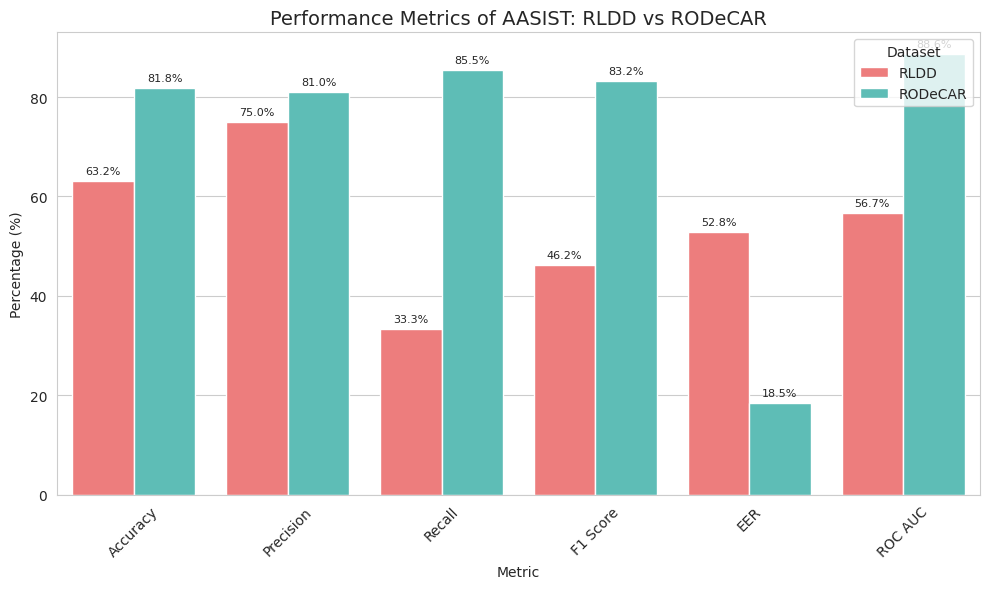

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare the data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'EER', 'ROC AUC']
rldd = [63.158, 75.000, 33.333, 46.154, 52.778, 0.567]
rodec = [81.818, 80.982, 85.529, 83.193, 18.520, 0.886]

df = pd.DataFrame({
    'Metric': metrics,
    'RLDD': rldd,
    'RODeCAR': rodec
})

# Convert ROC AUC to percent for visual consistency
df['RLDD'][:-1] = df['RLDD'][:-1].astype(float)
df['RODeCAR'][:-1] = df['RODeCAR'][:-1].astype(float)
df.loc[df['Metric'] == 'ROC AUC', ['RLDD', 'RODeCAR']] *= 100

# Melt dataframe for plotting
df_melted = df.melt(id_vars='Metric', var_name='Dataset', value_name='Value')

# Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
palette = {'RLDD': '#FF6B6B', 'RODeCAR': '#4ECDC4'}
sns.barplot(data=df_melted, x='Metric', y='Value', hue='Dataset', palette=palette)

# Annotate bars
for i in range(len(df)):
    for j, dataset in enumerate(['RLDD', 'RODeCAR']):
        val = df.loc[i, dataset]
        plt.text(i - 0.2 + 0.4*j, val + 1, f'{val:.1f}%', ha='center', va='bottom', fontsize=8)

plt.title('Performance Metrics of AASIST: RLDD vs RODeCAR', fontsize=14)
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


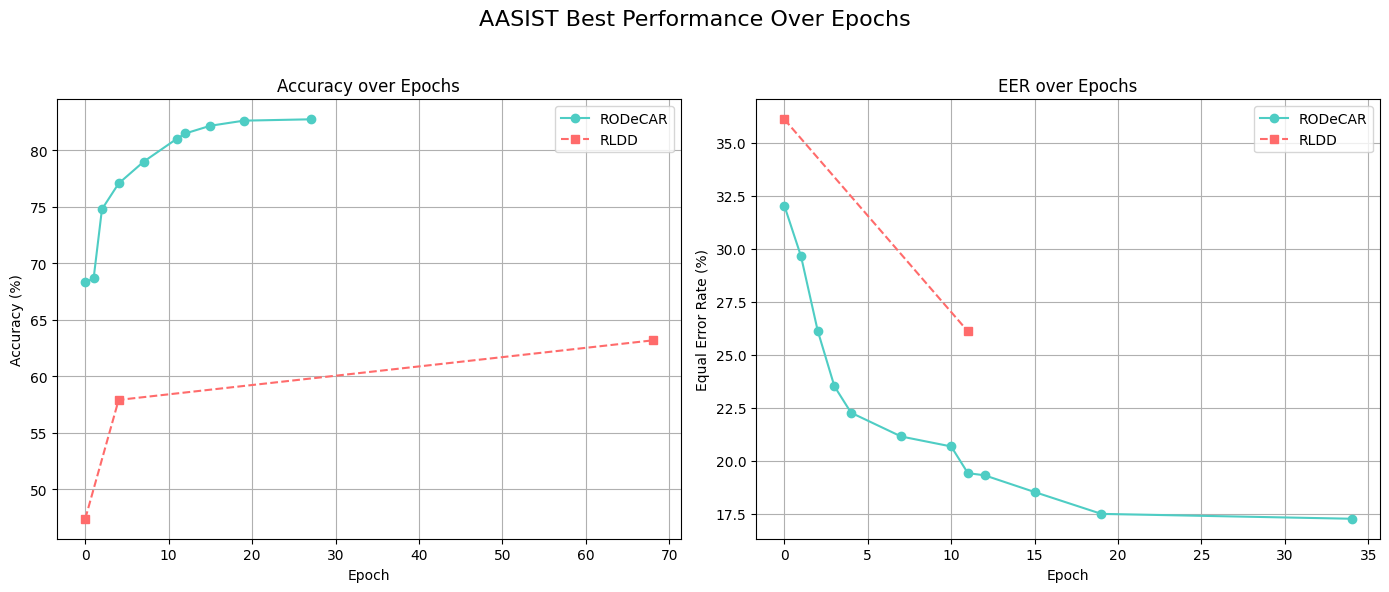

In [1]:
import matplotlib.pyplot as plt

# RODeCAR dataset
rodecar_epochs = [0, 1, 2, 4, 7, 11, 12, 15, 19, 27]
rodecar_accuracy = [68.30, 68.64, 74.77, 77.05, 78.98, 81.02, 81.48, 82.16, 82.61, 82.73]
rodecar_eer_epochs = [0, 1, 2, 3, 4, 7, 10, 11, 12, 15, 19, 34]
rodecar_eer = [32.04, 29.65, 26.14, 23.52, 22.27, 21.15, 20.68, 19.42, 19.32, 18.53, 17.50, 17.27]

# RLDD dataset
rldd_epochs_acc = [0, 4, 68]
rldd_accuracy = [47.37, 57.89, 63.16]
rldd_epochs_eer = [0, 11]
rldd_eer = [36.11, 26.11]

# Set up plot style
plt.figure(figsize=(14, 6))
plt.suptitle('AASIST Best Performance Over Epochs', fontsize=16)

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(rodecar_epochs, rodecar_accuracy, 'o-', label='RODeCAR', color='#4ECDC4')
plt.plot(rldd_epochs_acc, rldd_accuracy, 's--', label='RLDD', color='#FF6B6B')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy over Epochs')
plt.grid(True)
plt.legend()

# EER Plot
plt.subplot(1, 2, 2)
plt.plot(rodecar_eer_epochs, rodecar_eer, 'o-', label='RODeCAR', color='#4ECDC4')
plt.plot(rldd_epochs_eer, rldd_eer, 's--', label='RLDD', color='#FF6B6B')
plt.xlabel('Epoch')
plt.ylabel('Equal Error Rate (%)')
plt.title('EER over Epochs')
plt.grid(True)
plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


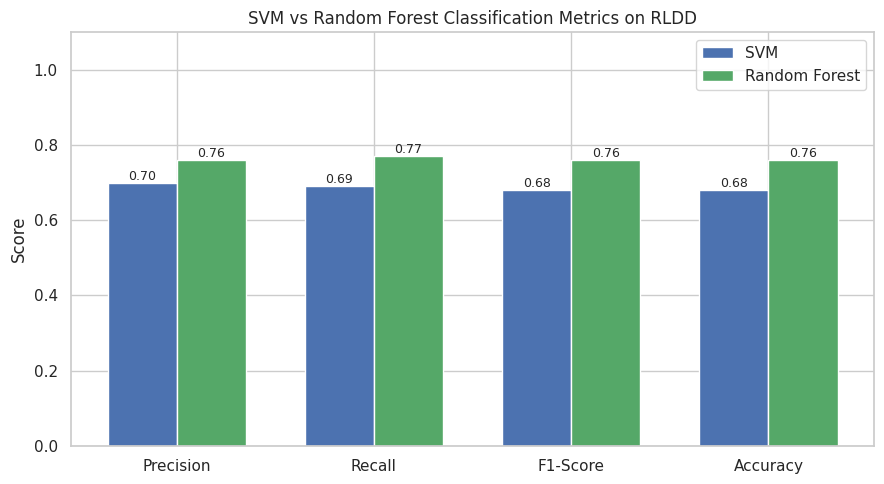

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define metrics
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']

# SVM values
svm_scores = [0.70, 0.69, 0.68, 0.68]  # macro avg + accuracy

# RF values
rf_scores = [0.76, 0.77, 0.76, 0.76]  # macro avg + accuracy

x = np.arange(len(metrics))  # positions
bar_width = 0.35

fig, ax = plt.subplots(figsize=(9, 5))

# Plot bars
bars1 = ax.bar(x - bar_width/2, svm_scores, width=bar_width, label='SVM', color='#4C72B0')
bars2 = ax.bar(x + bar_width/2, rf_scores, width=bar_width, label='Random Forest', color='#55A868')

# Add values on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    ha='center', va='bottom', fontsize=9)

# Labels and aesthetics
ax.set_ylabel('Score')
ax.set_title('SVM vs Random Forest Classification Metrics on RLDD')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()

plt.tight_layout()
plt.show()

